<a href="https://colab.research.google.com/github/mudrab/MACHINE-LEARNING-PROJECTS/blob/main/Autism_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('train.csv')
print(df.head())

   ID  A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0   1         1         0         1         0         1         0         1   
1   2         0         0         0         0         0         0         0   
2   3         1         1         1         1         1         1         1   
3   4         0         0         0         0         0         0         0   
4   5         0         0         0         0         0         0         0   

   A8_Score  A9_Score  ...  gender       ethnicity jaundice austim  \
0         0         1  ...       f               ?       no     no   
1         0         0  ...       m               ?       no     no   
2         1         1  ...       m  White-European       no    yes   
3         0         0  ...       f               ?       no     no   
4         0         0  ...       m               ?       no     no   

   contry_of_res used_app_before     result     age_desc  relation Class/ASD  
0        Austria         

In [ ]:
df.shape


(800, 22)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [ ]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
ID,800.0,400.500000,231.084400,1.000000,200.750000,400.500000,600.250000,800.000000
A1_Score,800.0,0.560000,0.496697,0.000000,0.000000,1.000000,1.000000,1.000000
A2_Score,800.0,0.530000,0.499411,0.000000,0.000000,1.000000,1.000000,1.000000
A3_Score,800.0,0.450000,0.497805,0.000000,0.000000,0.000000,1.000000,1.000000
A4_Score,800.0,0.415000,0.493030,0.000000,0.000000,0.000000,1.000000,1.000000
A5_Score,800.0,0.395000,0.489157,0.000000,0.000000,0.000000,1.000000,1.000000
A6_Score,800.0,0.303750,0.460164,0.000000,0.000000,0.000000,1.000000,1.000000
A7_Score,800.0,0.397500,0.489687,0.000000,0.000000,0.000000,1.000000,1.000000
A8_Score,800.0,0.508750,0.500236,0.000000,0.000000,1.000000,1.000000,1.000000
A9_Score,800.0,0.495000,0.500288,0.000000,0.000000,0.000000,1.000000,1.000000


Data Cleaning

In [ ]:
df['ethnicity'].value_counts()


,count
ethnicity,
White-European,257
?,203
Middle Eastern,97
Asian,67
Black,47
South Asian,34
Pasifika,32
Others,29
Latino,17


In [ ]:
df['relation'].value_counts()


,count
relation,
Self,709
?,40
Parent,29
Relative,18
Others,2
Health care professional,2


In [ ]:
df = df.replace({'yes':1, 'no':0, '?':'Others', 'others':'Others'})


Exploratory Data Analysis

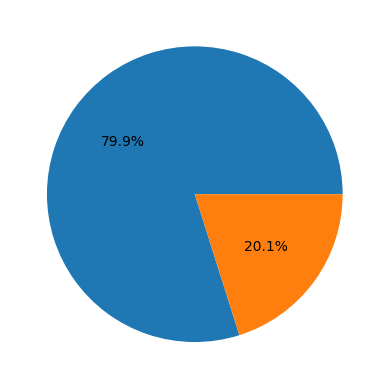

In [ ]:
plt.pie(df['Class/ASD'].value_counts().values, autopct='%1.1f%%')
plt.show()


In [ ]:
ints = []
objects = []
floats = []

for col in df.columns:
  if df[col].dtype == int:
    ints.append(col)
  elif df[col].dtype == object:
    objects.append(col)
  else:
    floats.append(col)


In [ ]:
ints.remove('ID')
ints.remove('Class/ASD')


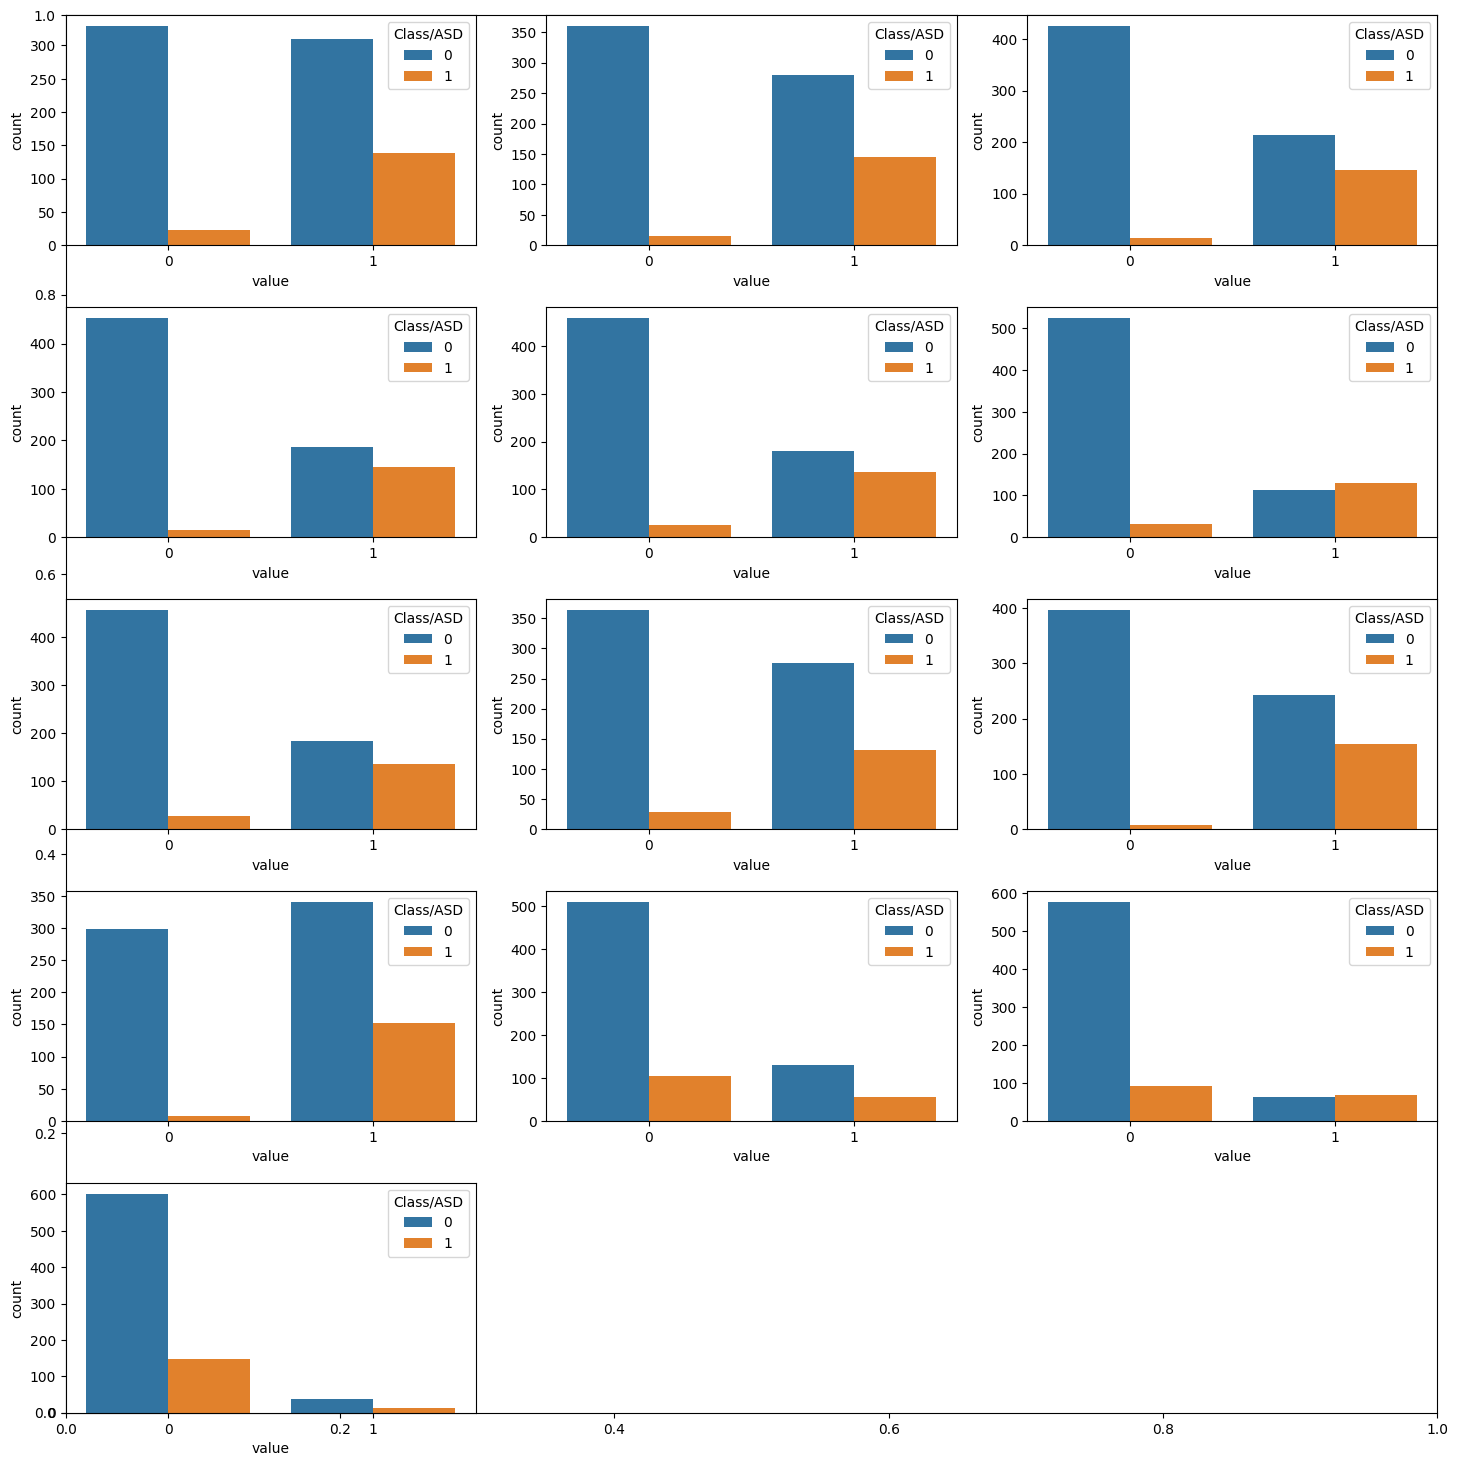

In [ ]:
# Convert the data to long-form using melt
df_melted = df.melt(id_vars=['ID', 'Class/ASD'], value_vars=ints, var_name='col', value_name='value')

plt.subplots(figsize=(15,15))

for i, col in enumerate(ints):
  plt.subplot(5,3,i+1)
  # Use the melted DataFrame and specify x and hue
  sb.countplot(x='value', hue='Class/ASD', data=df_melted[df_melted['col'] == col])

plt.tight_layout()
plt.show()




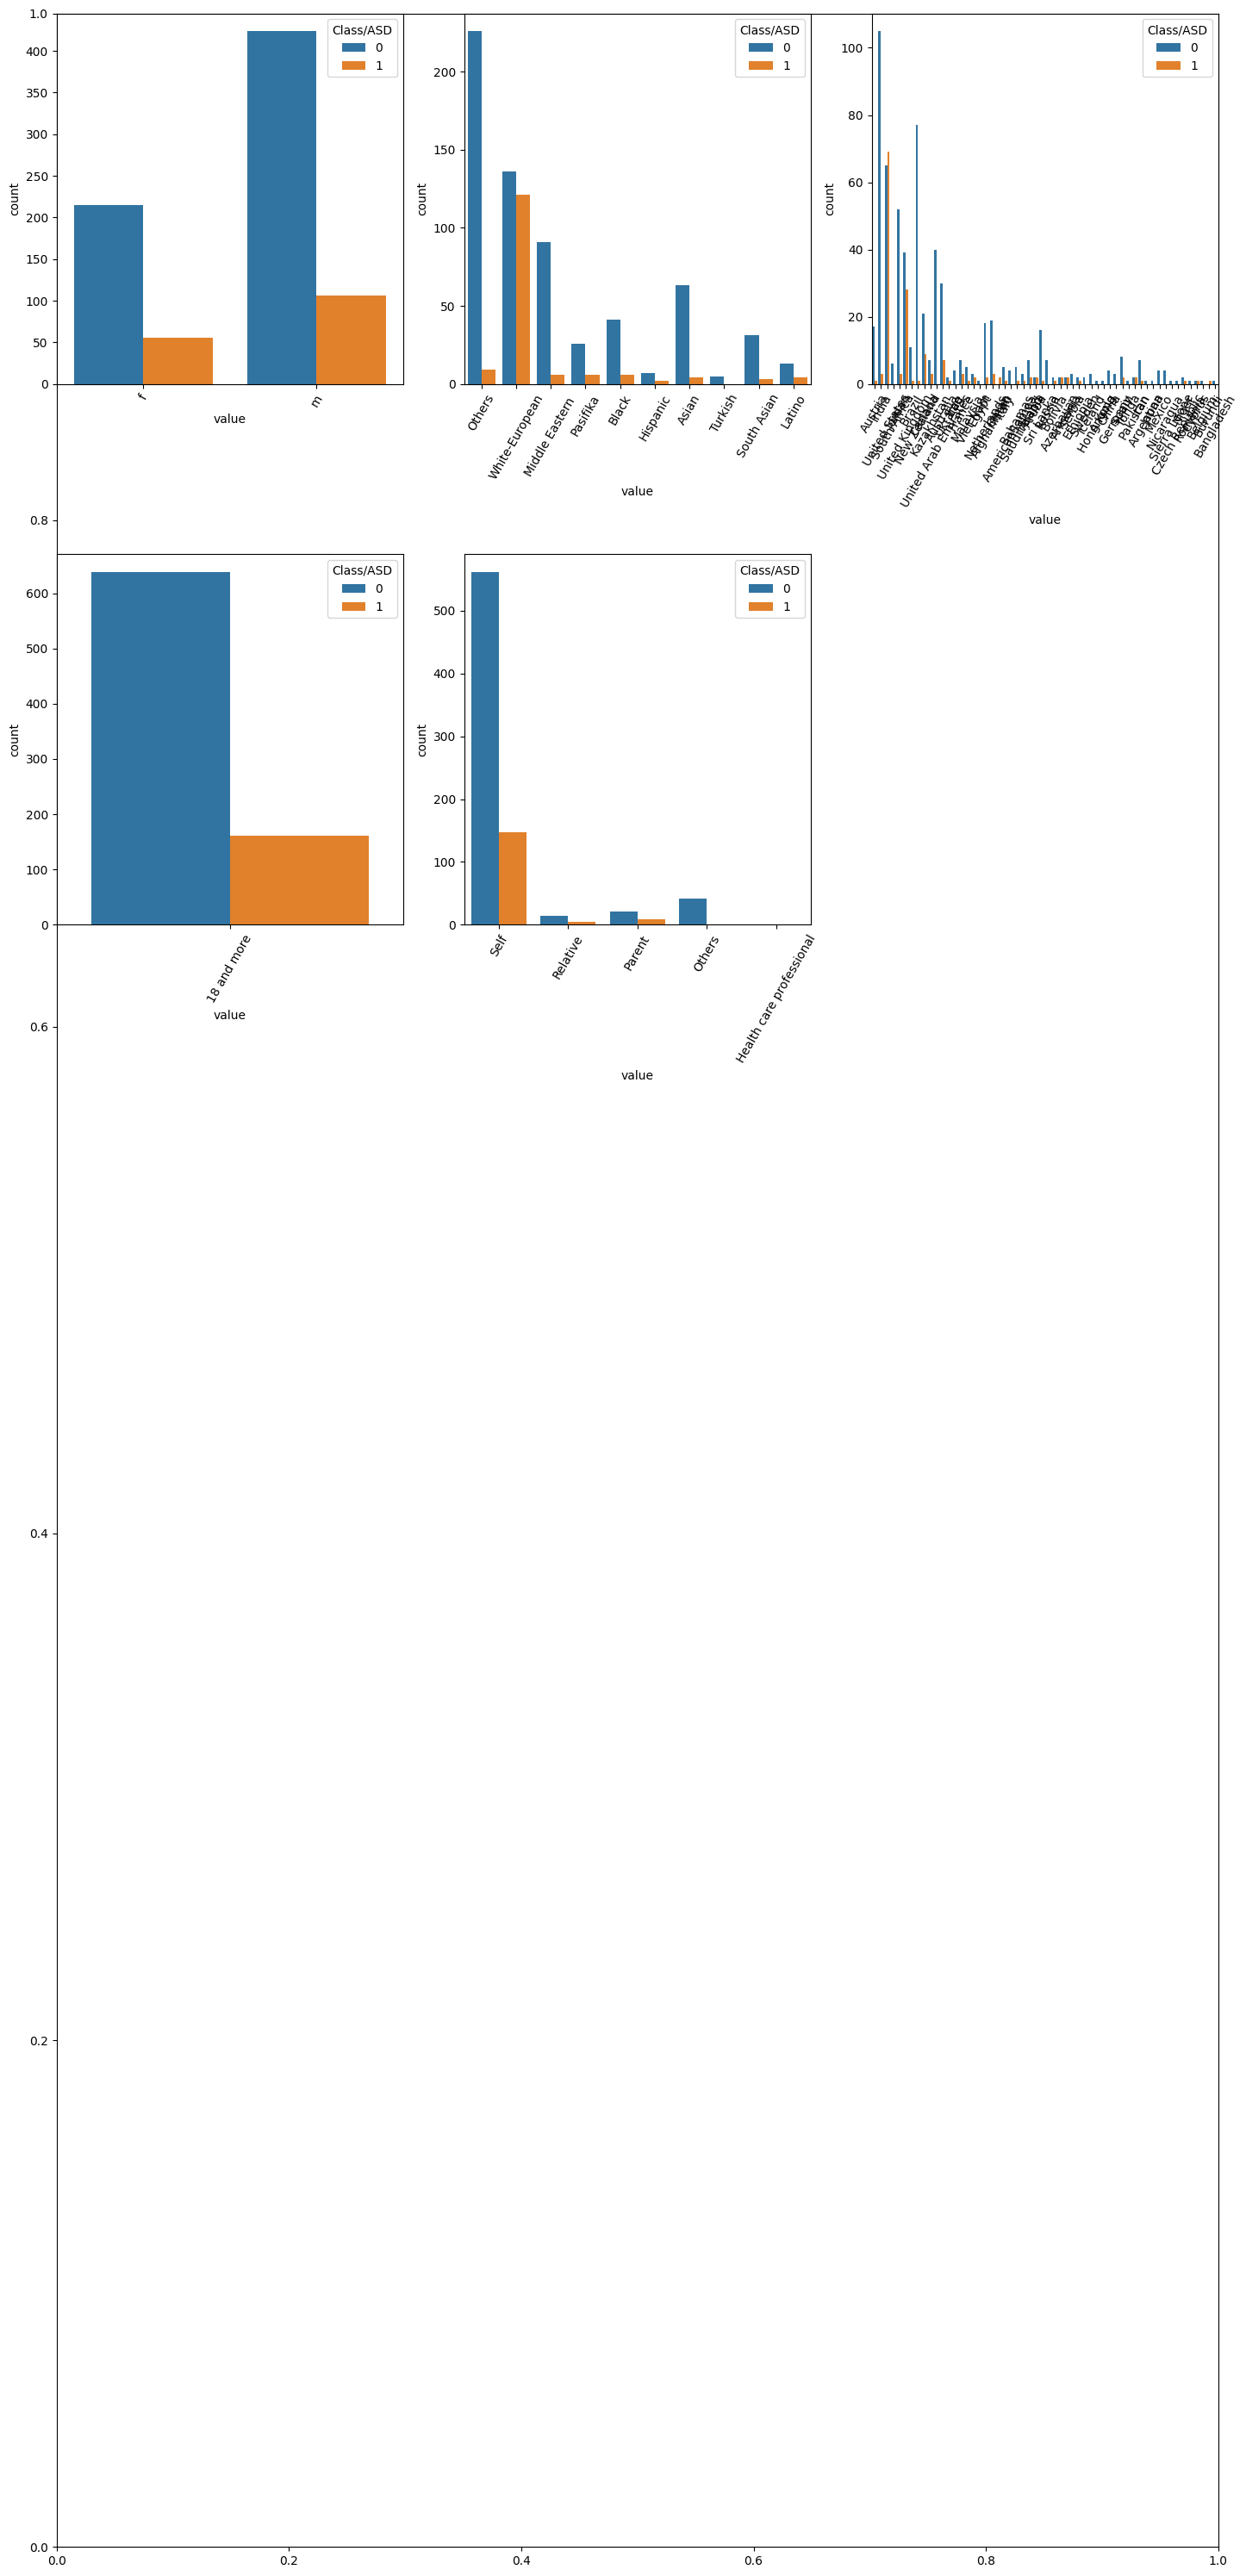

In [ ]:
plt.subplots(figsize=(15, 30))

for i, col in enumerate(objects):
    plt.subplot(5, 3, i+1)
    # Convert the data to long-form for the specific column
    df_melted = df.melt(id_vars=['Class/ASD'], value_vars=[col], var_name='col', value_name='value')

    # Use the melted DataFrame and specify x and hue
    sb.countplot(x='value', hue='Class/ASD', data=df_melted)
    plt.xticks(rotation=60)

plt.tight_layout()
plt.show()



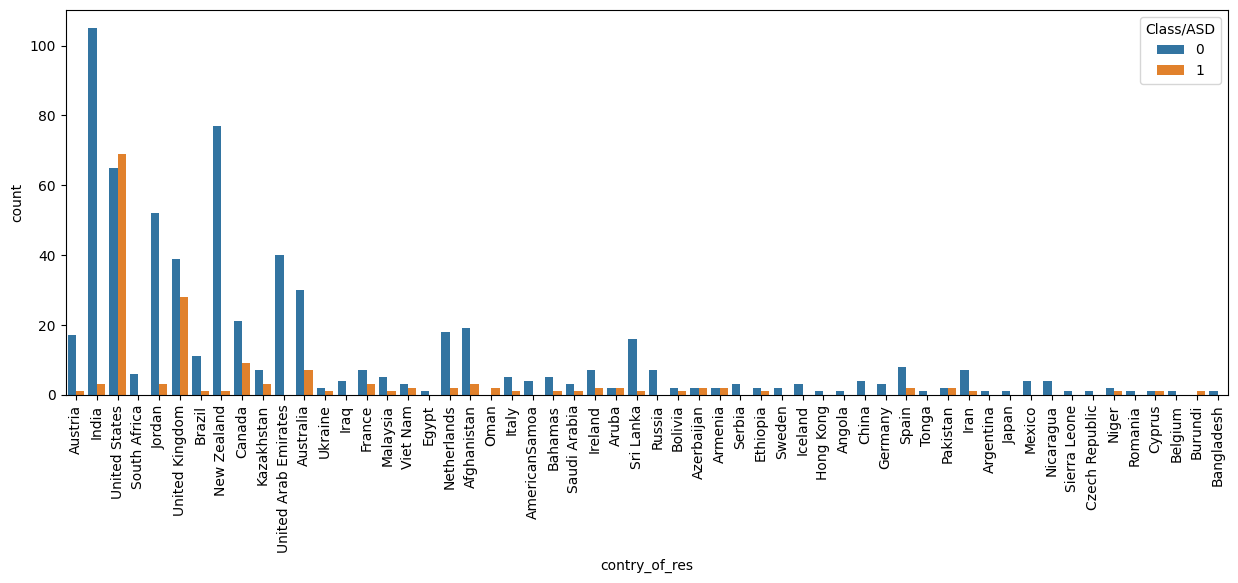

In [ ]:
plt.figure(figsize=(15,5))
sb.countplot(data=df, x='contry_of_res', hue='Class/ASD')
plt.xticks(rotation=90)
plt.show()




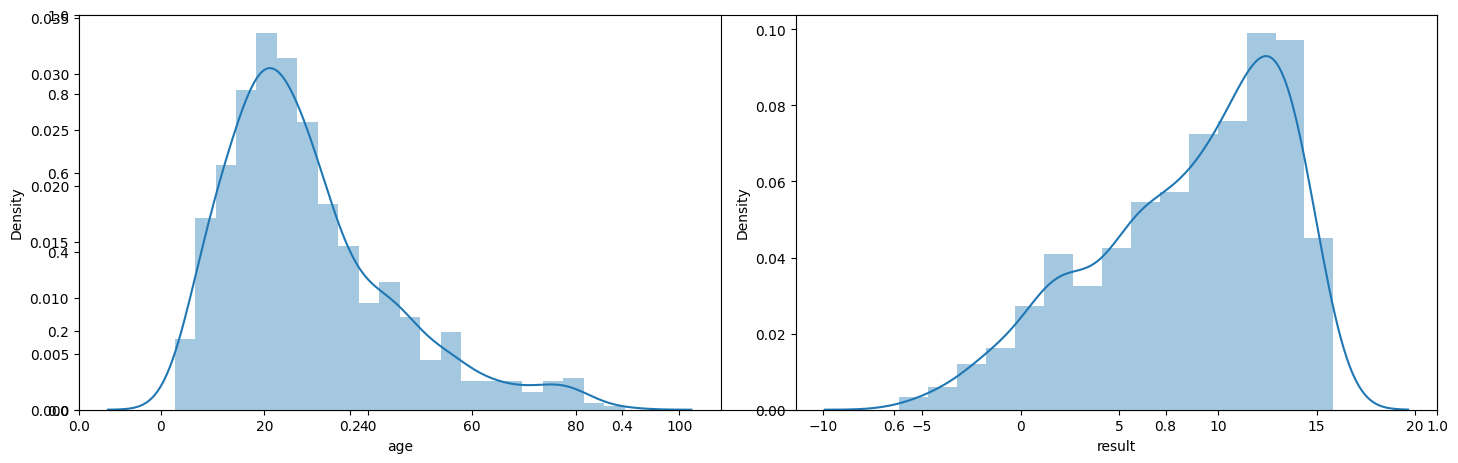

In [ ]:
plt.subplots(figsize=(15,5))

for i, col in enumerate(floats):
  plt.subplot(1,2,i+1)
  sb.distplot(df[col])
plt.tight_layout()
plt.show()


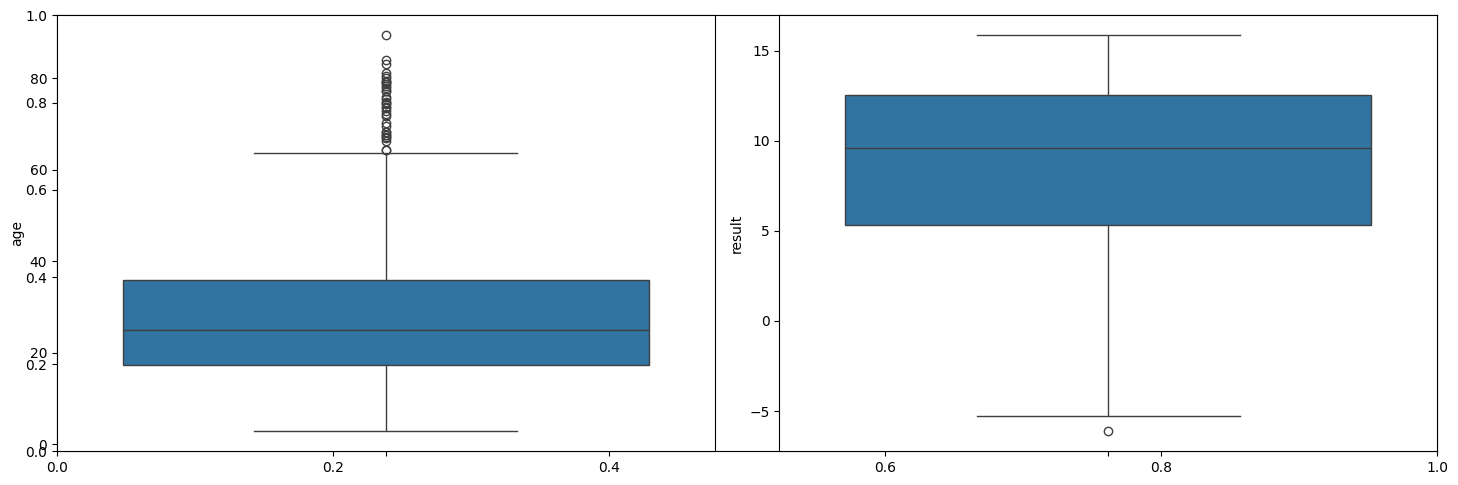

In [ ]:
plt.subplots(figsize=(15,5))

for i, col in enumerate(floats):
  plt.subplot(1,2,i+1)
  sb.boxplot(df[col])
plt.tight_layout()
plt.show()


In [ ]:
df = df[df['result']>-5]
df.shape


(798, 22)

In [ ]:
# This functions make groups by taking
# the age as a parameter
def convertAge(age):
    if age < 4:
        return 'Toddler'
    elif age < 12:
        return 'Kid'
    elif age < 18:
        return 'Teenager'
    elif age < 40:
        return 'Young'
    else:
        return 'Senior'

df['ageGroup'] = df['age'].apply(convertAge)


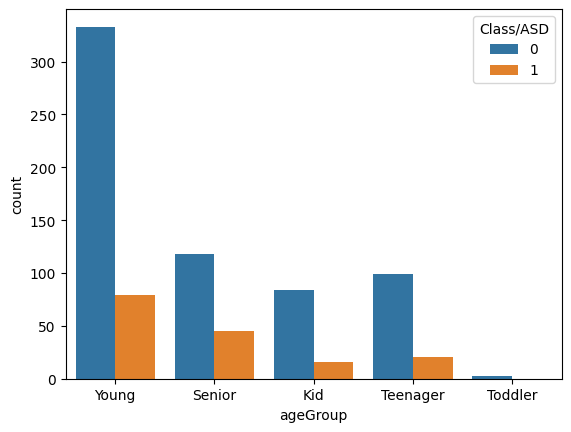

In [ ]:
sb.countplot(x=df['ageGroup'], hue=df['Class/ASD'])
plt.show()


In [ ]:
def add_feature(data):

  # Creating a column with all values zero
  data['sum_score'] = 0
  for col in data.loc[:,'A1_Score':'A10_Score'].columns:

    # Updating the 'sum_score' value with scores
    # from A1 to A10
    data['sum_score'] += data[col]

  # Creating a random data using the below three columns
  data['ind'] = data['austim'] + data['used_app_before'] + data['jaundice']

  return data

df = add_feature(df)


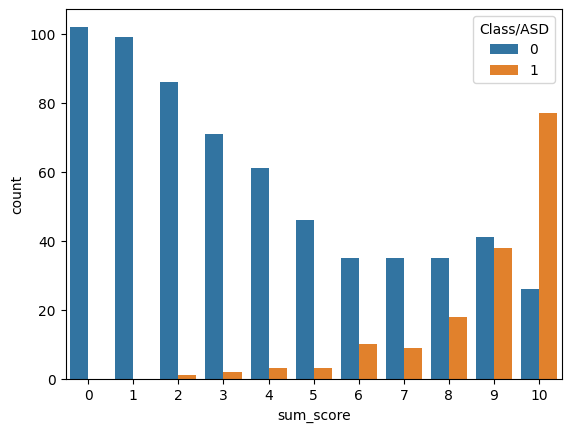

In [ ]:
sb.countplot(x=df['sum_score'], hue=df['Class/ASD'])
plt.show()


In [ ]:
# Applying log transformations to remove the skewness of the data.
df['age'] = df['age'].apply(lambda x: np.log(x))


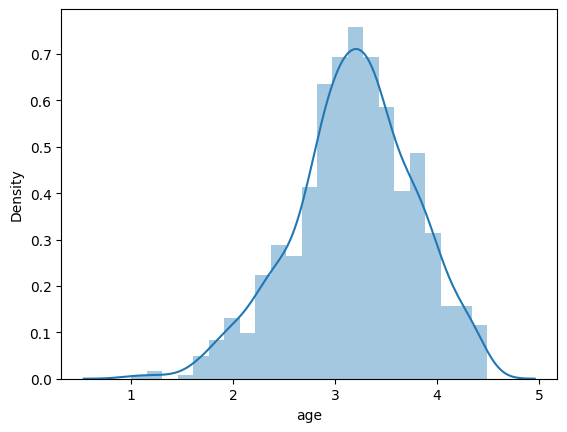

In [ ]:
sb.distplot(df['age'])
plt.show()


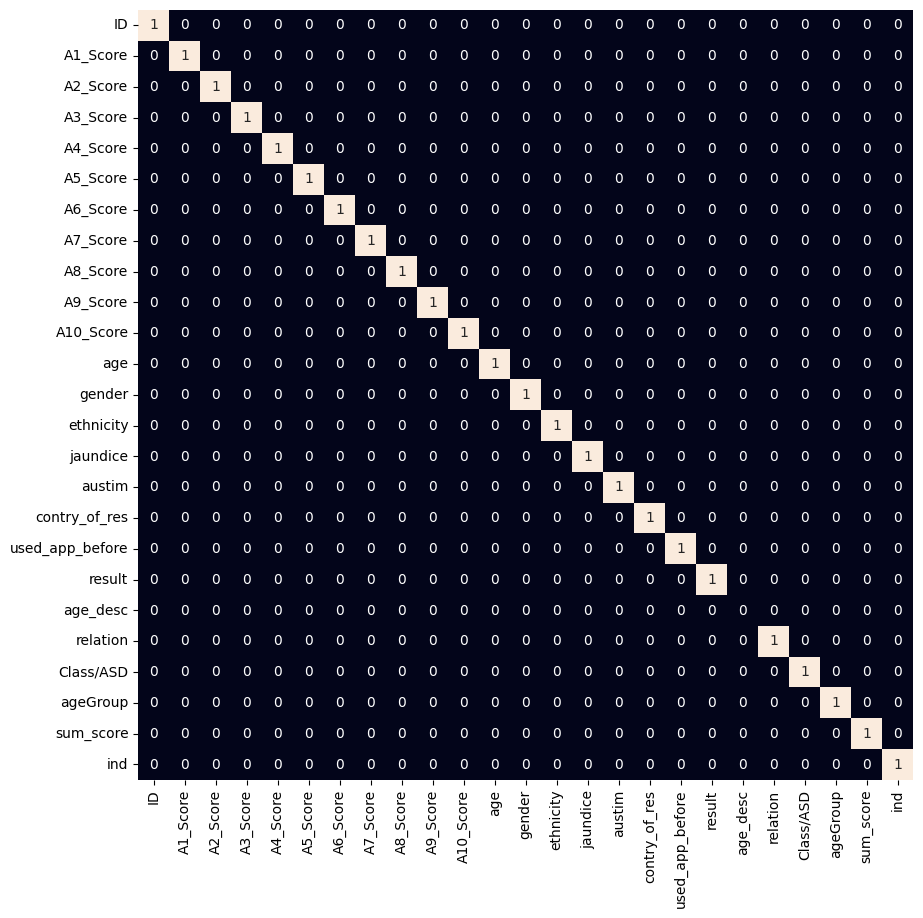

In [ ]:
def encode_labels(data):
    for col in data.columns:

      # Here we will check if datatype
      # is object then we will encode it
      if data[col].dtype == 'object':
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col])

    return data

df = encode_labels(df)

# Making a heatmap to visualize the correlation matrix
plt.figure(figsize=(10,10))
sb.heatmap(df.corr() > 0.8, annot=True, cbar=False)
plt.show()


In [ ]:
removal = ['ID', 'age_desc', 'used_app_before', 'austim']
features = df.drop(removal + ['Class/ASD'], axis=1)
target = df['Class/ASD']


In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(features, target, test_size = 0.2, random_state=10)

# As the data was highly imbalanced we will balance it by adding repetitive rows of minority class.
ros = RandomOverSampler(sampling_strategy='minority',random_state=0)
X, Y = ros.fit_resample(X_train,Y_train)
X.shape, Y.shape


((1026, 20), (1026,))

In [ ]:
# Normalizing the features for stable and fast training.
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_val = scaler.transform(X_val)


In [ ]:
models = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf')]

for model in models:
  model.fit(X, Y)

  print(f'{model} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(Y, model.predict(X)))
  print('Validation Accuracy : ', metrics.roc_auc_score(Y_val, model.predict(X_val)))
  print()


LogisticRegression() : 
Training Accuracy :  0.8664717348927876
Validation Accuracy :  0.782258064516129

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Accuracy :  1.0
Validation Accuracy :  0.7491039426523298

SVC() : 
Training Accuracy :  0.9405458089668616
Validation Accur

Model Evaluation

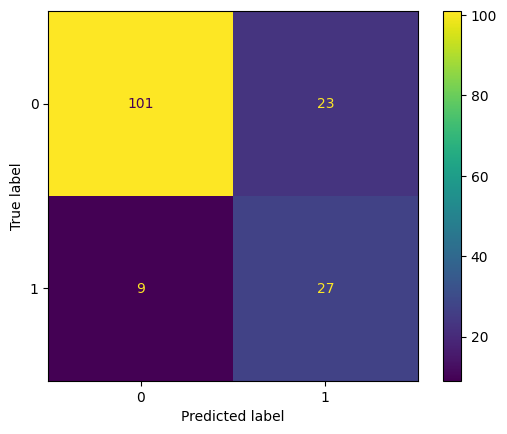

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(models[0], X_val, Y_val)
plt.show()


